In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from scipy.fft import fft 
from scipy.stats import kurtosis, skew
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\FinalDataset.csv')

In [26]:
df.head()

,Start Timestamp,End Timestamp,Mean,Max,Standard Deviation,RMS,Kurtosis,Skewness,Peak-to-Peak,Abs Diff Signal,...,FFT_115,FFT_116,FFT_117,FFT_118,FFT_119,FFT_120,FFT_121,FFT_122,FFT_123,FFT_124
0,0.012,0.989,-1.94008,26.53,30.120589,30.183006,3.609067,-1.923705,136.84,204.03,...,237.790452,264.376924,295.345862,336.737483,393.824387,469.955157,585.479846,775.534162,1138.207589,1954.867013
1,0.497,1.490,-2.23216,20.56,8.163469,8.463142,0.661358,1.322351,30.28,38.80,...,44.295331,49.915725,55.452187,63.361122,74.665352,90.848103,112.943277,155.706170,249.347067,614.890518
2,0.989,1.992,-1.69672,6.39,5.572750,5.825324,-1.492188,-0.085436,16.11,16.61,...,32.439161,36.144891,40.262516,45.270429,53.865685,65.215566,80.490928,107.661839,166.661235,417.672556
3,1.490,2.486,5.03216,7.02,2.371238,5.562859,0.101943,-1.152768,8.30,9.45,...,16.449261,16.814762,19.890015,22.285721,27.086053,31.336451,38.970047,55.366783,75.773360,167.894435
4,1.992,2.977,6.19720,7.02,0.733511,6.240459,-0.985350,-0.624499,2.34,3.57,...,3.288911,3.617411,4.559092,4.741178,5.990614,7.031352,9.001152,12.678156,20.795149,57.165102


In [27]:
X= df[['Mean','Max','Standard Deviation','RMS','Kurtosis','Skewness','Peak-to-Peak','Abs Diff Signal','Alpha Power','Beta Power','Gamma Power','Delta Power','Theta Power']]

In [28]:
X.head()

,Mean,Max,Standard Deviation,RMS,Kurtosis,Skewness,Peak-to-Peak,Abs Diff Signal,Alpha Power,Beta Power,Gamma Power,Delta Power,Theta Power
0,-1.94008,26.53,30.120589,30.183006,3.609067,-1.923705,136.84,204.03,1205.752892,1607.338270,1826.741342,4454.088609,2081.342735
1,-2.23216,20.56,8.163469,8.463142,0.661358,1.322351,30.28,38.80,227.823945,448.906104,414.804326,1132.887032,397.270041
2,-1.69672,6.39,5.572750,5.825324,-1.492188,-0.085436,16.11,16.61,163.738234,318.649312,294.856503,772.486558,285.105125
3,5.03216,7.02,2.371238,5.562859,0.101943,-1.152768,8.30,9.45,79.711007,159.990519,146.758619,338.004624,139.568286
4,6.19720,7.02,0.733511,6.240459,-0.985350,-0.624499,2.34,3.57,17.430185,34.657760,32.206988,99.639558,31.323388


In [29]:
y= df['Label']

In [30]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, shuffle= True)

In [31]:
X_train.head()

,Mean,Max,Standard Deviation,RMS,Kurtosis,Skewness,Peak-to-Peak,Abs Diff Signal,Alpha Power,Beta Power,Gamma Power,Delta Power,Theta Power
487,0.22088,5.66,2.511240,2.520935,-0.551236,-0.013792,11.04,120.15,172.113882,398.072391,104.204025,271.030112,202.026246
1184,0.62592,15.94,7.156349,7.183669,-1.201456,-0.001223,28.22,909.61,122.536741,1081.040333,197.695748,237.035115,157.933459
883,-1.71000,100.25,33.180074,33.224109,1.031842,0.863535,170.25,715.65,1264.798797,1804.351439,320.590279,4395.288445,2438.100885
2790,0.66832,6.75,1.892348,2.006897,0.642854,0.558900,10.63,106.38,214.383378,355.760214,55.637464,102.091067,189.151574
1095,0.75656,11.84,5.660902,5.711234,-0.929838,-0.027631,24.31,694.82,209.680125,974.442154,107.159909,172.966709,196.521740


In [32]:
X_train.shape

(2295, 13)

In [33]:
y_train.head()

487     0
1184    3
883     3
2790    2
1095    3
Name: Label, dtype: int64

In [34]:
ss= StandardScaler()
X_train_ss= ss.fit_transform(X_train)
X_test_ss= ss.fit_transform(X_test)

In [35]:
model = Sequential([
    Dense(80, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(30, activation='relu'),
    Dropout(0.2),
    Dense(80, activation='relu'),
    Dropout(0.1),
    Dense(4,activation='softmax')
])
model.build()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 80)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 80)                  │           2,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             324 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,354 (24.82 KB)

 Trainable params: 6,354 (24.82 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    metrics=['accuracy'],
    loss= 'sparse_categorical_crossentropy',
    optimizer= 'adam'
)

Epoch 1/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2583 - loss: 1.4043 - val_accuracy: 0.2702 - val_loss: 1.3818
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3046 - loss: 1.3694 - val_accuracy: 0.3813 - val_loss: 1.3584
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 1.3641 - val_accuracy: 0.3573 - val_loss: 1.3454
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3511 - loss: 1.3409 - val_accuracy: 0.3834 - val_loss: 1.3202
Epoch 5/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 1.3091 - val_accuracy: 0.3791 - val_loss: 1.2931
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3544 - loss: 1.2934 - val_accuracy: 0.4336 - val_loss: 1.2654
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3729 - loss: 1.2821 - val_accuracy: 0.4096 - val_loss: 1.2633
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4164 - loss: 1.2637 - val_accuracy: 0.4336 - val_loss

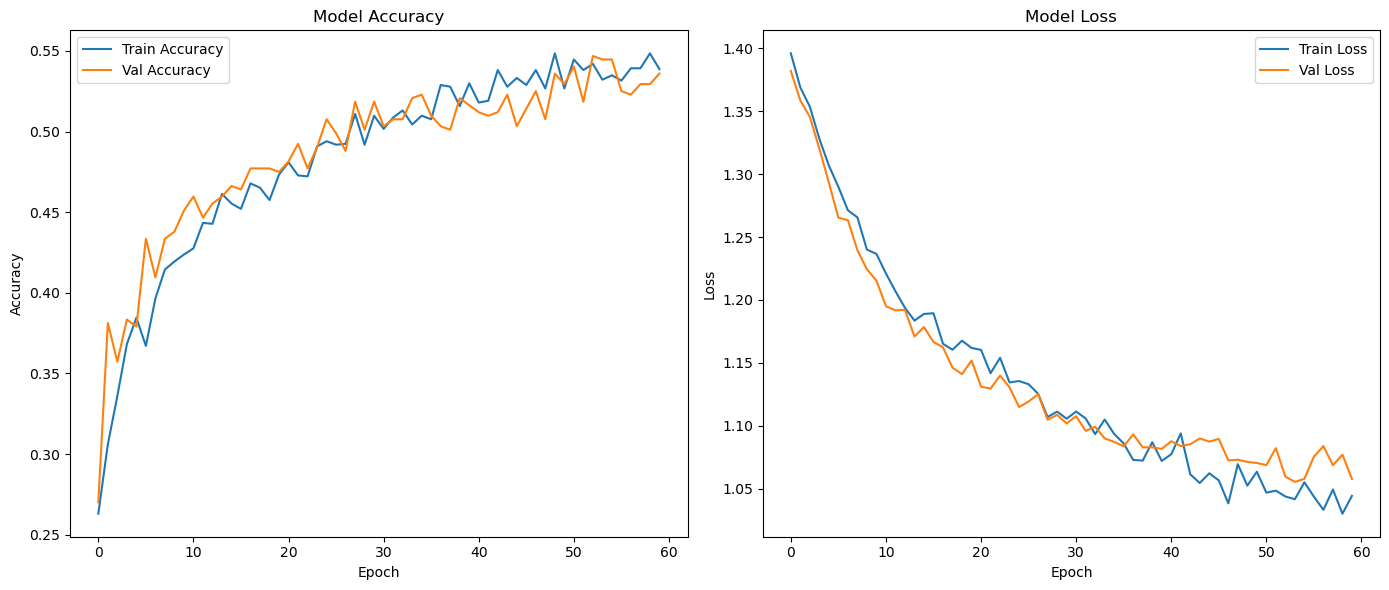

In [15]:
def plot_training_history(history):
    plt.figure(figsize=(14, 6))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('Validation vs Train')
    plt.show()

# Assuming `history` is the object returned by model.fit()
history = model.fit(X_train_ss, y_train, epochs=60, validation_split=0.2, batch_size=50)

plot_training_history(history)


In [17]:
model.evaluate(X_test_ss, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5139 - loss: 1.0667 


[1.082653522491455, 0.5017421841621399]

In [18]:
y_predict =model.predict(X_test_ss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [19]:
model.save('path_to_trained_model.h5')

In [150]:
def generate_synthetic_eeg(duration=0.5, sample_rate=128, num_samples=10):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    synthetic_signals = []
    for _ in range(num_samples):
        # Add variability to synthetic signals
        freq = np.random.uniform(8, 30)  # Random frequency within a wider band (8-30 Hz)
        amplitude = np.random.uniform(0.5, 1.5)  # Random amplitude
        noise = np.random.normal(0, 0.1, t.shape)  # Reduced noise to better simulate real data
        signal = amplitude * np.sin(2 * np.pi * freq * t) + noise
        synthetic_signals.append(signal)
    return np.array(synthetic_signals)

In [151]:
def extract_features(signal):
    # FFT features
    fft_vals = np.abs(fft(signal))[:125]  # First 125 FFT components
    # Statistical features
    mean_val = np.mean(signal)
    max_val = np.max(signal)
    std_val = np.std(signal)
    rms_val = np.sqrt(np.mean(signal**2))
    kurt_val = kurtosis(signal)
    skew_val = skew(signal)
    peak_to_peak_val = np.ptp(signal)
    abs_diff_val = np.sum(np.abs(np.diff(signal)))
    
    # Frequency band powers
    alpha_power = np.sum(np.abs(fft_vals[8:12]))  # Example band
    beta_power = np.sum(np.abs(fft_vals[12:30]))
    gamma_power = np.sum(np.abs(fft_vals[30:100]))
    delta_power = np.sum(np.abs(fft_vals[0:4]))
    theta_power = np.sum(np.abs(fft_vals[4:8]))

    return np.array([mean_val, max_val, std_val, rms_val, kurt_val, skew_val,
                     peak_to_peak_val, abs_diff_val, alpha_power, beta_power,
                     gamma_power, delta_power, theta_power])

In [152]:
def simulate_real_time_processing(model, duration=0.5, sample_rate=128, num_samples=10):
    synthetic_signals = generate_synthetic_eeg(duration=duration, sample_rate=sample_rate, num_samples=num_samples)
    
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit scaler on an initial dummy feature set to standardize later
    dummy_signal = generate_synthetic_eeg(duration=duration, sample_rate=sample_rate, num_samples=1)[0]
    dummy_features = extract_features(dummy_signal)
    scaler.fit(dummy_features.reshape(-1, 1))

    for synthetic_signal in synthetic_signals:
        # Extract features
        features = extract_features(synthetic_signal)

        # Standardize features
        features = scaler.transform(features.reshape(-1, 1)).flatten()

        # Predict movement
        features = features.reshape(1, -1)  # Reshape for prediction
        movement = model.predict(features)
        movement_label = ['Backward', 'Left', 'Right', 'Forward'][np.argmax(movement)]
        
        print(f'Real-Time Prediction: {movement_label}')

In [153]:
model = tf.keras.models.load_model('path_to_trained_model.h5')

simulate_real_time_processing(model, duration=0.5, sample_rate=128, num_samples=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Real-Time Prediction: Right
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Real-Time Prediction: Right
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Real-Time Prediction: Backward
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Real-Time Prediction: Backward


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

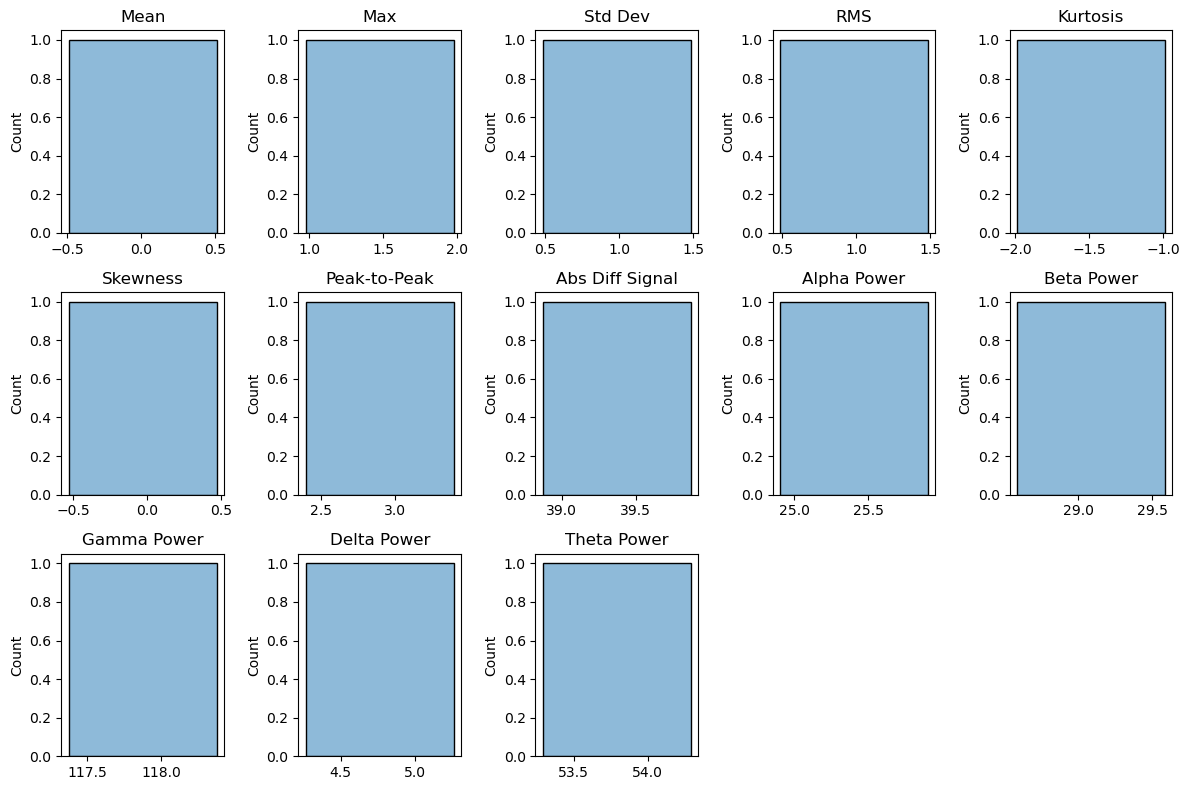

In [155]:
def plot_feature_distribution(features, feature_names):
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(features.T):
        plt.subplot(3, 5, i+1)
        sns.histplot(feature, kde=True)
        plt.title(feature_names[i])
    plt.tight_layout()
    plt.savefig('Feature')
    plt.show()

# Example to plot distribution of extracted features
dummy_signal = generate_synthetic_eeg(duration=0.5, sample_rate=128, num_samples=1)[0]
features = extract_features(dummy_signal)
feature_names = ['Mean', 'Max', 'Std Dev', 'RMS', 'Kurtosis', 'Skewness', 'Peak-to-Peak', 'Abs Diff Signal', 
                 'Alpha Power', 'Beta Power', 'Gamma Power', 'Delta Power', 'Theta Power']

plot_feature_distribution(features.reshape(1, -1), feature_names)


In [159]:
# !pip install pydot
import pydot
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


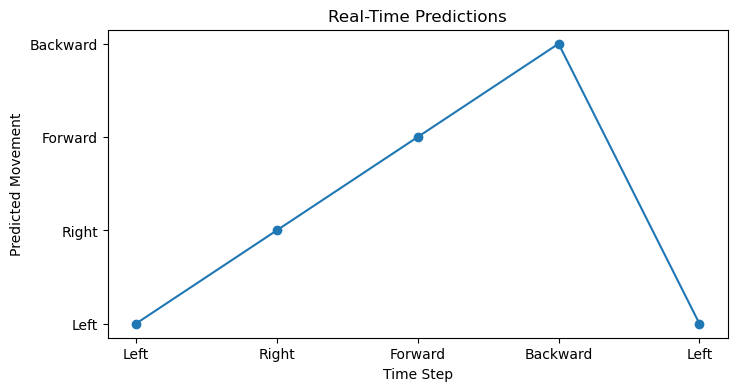

In [156]:
def plot_real_time_predictions(predictions):
    plt.figure(figsize=(8, 4))
    plt.plot(predictions, 'o-')
    plt.xlabel('Time Step')
    plt.ylabel('Predicted Movement')
    plt.title('Real-Time Predictions')
    plt.xticks(ticks=range(len(predictions)), labels=predictions)
    plt.savefig('Real-Time')
    plt.show()

# Example predictions
predictions = ['Left', 'Right', 'Forward', 'Backward', 'Left']
plot_real_time_predictions(predictions)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


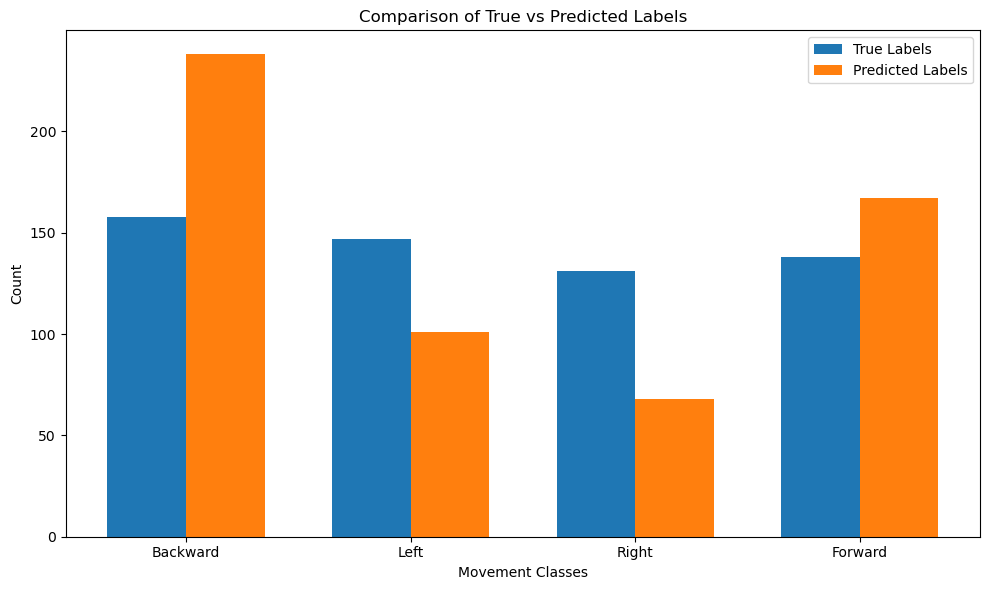

In [157]:
import matplotlib.pyplot as plt
import numpy as np

def plot_true_vs_predicted(y_true, y_pred, labels):
    plt.figure(figsize=(10, 6))

    # Count occurrences of each class in true and predicted labels
    true_counts = [np.sum(y_true == i) for i in range(len(labels))]
    pred_counts = [np.sum(y_pred == i) for i in range(len(labels))]

    bar_width = 0.35
    index = np.arange(len(labels))

    # Plotting
    plt.bar(index, true_counts, bar_width, label='True Labels')
    plt.bar(index + bar_width, pred_counts, bar_width, label='Predicted Labels')

    plt.xlabel('Movement Classes')
    plt.ylabel('Count')
    plt.title('Comparison of True vs Predicted Labels')
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()

    plt.tight_layout()
    plt.savefig('Labels')
    plt.show()

# Predict on test data
y_pred = np.argmax(model.predict(X_test_ss), axis=1)

# Plot true vs predicted labels comparison
plot_true_vs_predicted(y_test, y_pred, labels=['Backward', 'Left', 'Right', 'Forward'])


Epoch 1/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5356 - loss: 1.0342 - val_accuracy: 0.5664 - val_loss: 0.9880
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5395 - loss: 1.0343 - val_accuracy: 0.5556 - val_loss: 0.9898
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 1.0250 - val_accuracy: 0.5730 - val_loss: 0.9786
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 1.0417 - val_accuracy: 0.5643 - val_loss: 0.9925
Epoch 5/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5393 - loss: 1.0142 - val_accuracy: 0.5708 - val_loss: 0.9798
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5363 - loss: 1.0297 - val_accuracy: 0.5664 - val_loss: 0.9868
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5329 - loss: 1.0226 - val_accuracy: 0.5468 - val_loss: 0.9904
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5377 - loss: 1.0422 - val_accuracy: 0.5534 - val_loss:

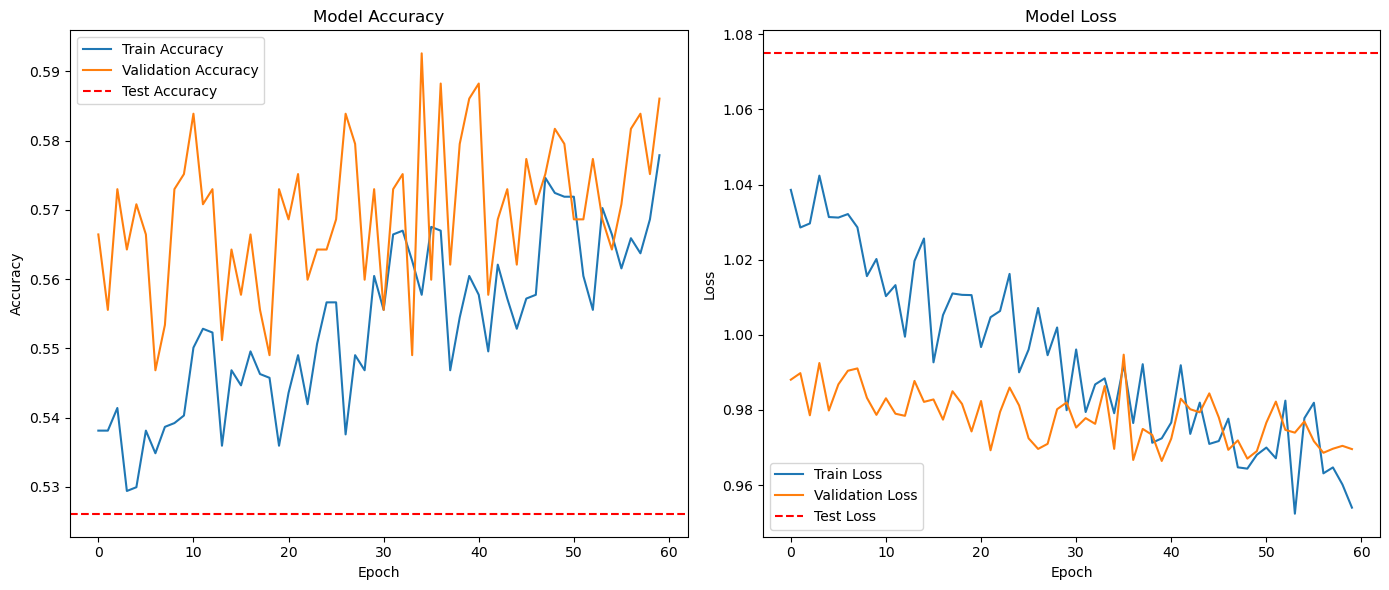

In [40]:
def plot_training_and_testing_history(history, X_test, y_test):
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Plot accuracy
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('comapre1')
    plt.show()

# Assuming `history` is the object returned by model.fit()
history = model.fit(X_train_ss, y_train, epochs=60, validation_split=0.2, batch_size=50)

# Plot training, validation, and testing history
plot_training_and_testing_history(history, X_test_ss, y_test)


In [41]:
model.evaluate(X_test_ss, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5325 - loss: 1.1061 


[1.0749149322509766, 0.5261324048042297]